<a href="https://colab.research.google.com/github/sid2305/Plant-Disease-Prediction/blob/master/PlantDiseaseCropped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/sid2305/PlantDiseaseAnalysis.git

Cloning into 'PlantDiseaseAnalysis'...
remote: Enumerating objects: 5140, done.
remote: Total 5140 (delta 0), reused 0 (delta 0), pack-reused 5140
Receiving objects: 100% (5140/5140), 932.12 MiB | 32.53 MiB/s, done.
Resolving deltas: 100% (2317/2317), done.
^C


In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
plant_village = tfds.load("plant_village")

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/plant_village/1.0.0.incompleteTI48RS/plant_village-train.tfrecord


Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.0. Subsequent calls will reuse this data.


In [ ]:
from os import listdir
# example of extracting bounding boxes from an annotation file
from xml.etree import ElementTree
import os, shutil, cv2

X = []
Z = []
X1 = []
Z1 = []
imgsize = 100

def extract_boxes(filename,image_name,is_train):
    tree = ElementTree.parse(filename)
    # get the root of the document
    root = tree.getroot()
    # extract each bounding box
    boxes = list()
    label = root.find('.//object/name').text
    #print(label)
    for box in root.findall('.//bndbox'):
        xmin = int(box.find('xmin').text)
        ymin = int(box.find('ymin').text)
        xmax = int(box.find('xmax').text)
        ymax = int(box.find('ymax').text)
        coors = (xmin, ymin, xmax, ymax)
        try:
            img = cv2.imread(image_name)
            crop_img = img[ymin:ymax, xmin:xmax]
            crop_img = cv2.resize(crop_img,(imgsize,imgsize))
            if is_train ==True:
              X.append(np.array(crop_img))
              Z.append(label)
            else:
              X1.append(np.array(crop_img))
              Z1.append(label)
        except Exception as e:
            print(str(e))
    # extract image dimensions
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    
    #return boxes, width, height
#to test extracr boxes method
#extract_boxes('PlantDiseaseAnalysis/TRAIN/0.xml','PlantDiseaseAnalysis/TRAIN/0.jpg')




In [ ]:
len(X)

In [ ]:
# function to extract bounding boxes from an annotation file
def load_dataset(dataset_dir,is_train):
    # define data locations
    images_dir = dataset_dir
    annotations_dir = dataset_dir
    # find all images
    for filename in listdir(images_dir):
        # extract image id
        if(filename==".DS_Store"):
            continue
        if '.jpg' in filename:
            image_id = filename[:-4]
            img_path = images_dir + filename
            #print(img_path)
            ann_path = annotations_dir + image_id + '.xml'
            #print(ann_path)
            # extract details form annotation file
            extract_boxes(ann_path,img_path,is_train)



In [ ]:
load_dataset('PlantDiseaseAnalysis/TRAIN/',True)
print("Image Loaded")

In [ ]:
apple_scab_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Apple___Apple_scab/'
apple_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Apple___healthy/'
apple_rust_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Apple___Cedar_apple_rust/'
apple_black_rot = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Apple___Black_rot/'
bell_pepper_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Pepper,_bell___healthy/'
Bell_pepper_spot = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Pepper,_bell___Bacterial_spot/'
blueberry_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Blueberry___healthy/'
cherry_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Cherry___healthy/'
cherry_powdery = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Cherry___Powdery_mildew/'
corn_gray_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Corn___Cercospora_leaf_spot Gray_leaf_spot/'
corn_leaf_blight = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Corn___Northern_Leaf_Blight/'
corn_rust_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Corn___Common_rust/'
corn_healthy = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Corn___healthy/'
orange_greening = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Orange___Haunglongbing_(Citrus_greening)/'
peach_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Peach___healthy/'
peach_bacterial = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Peach___Bacterial_spot/'
potato_leaf_early = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Potato___Early_blight/'
potato_leaf_late = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Potato___Late_blight/'
potato_healthy = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Potato___healthy/'
raspberry_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Raspberry___healthy/'
soyabean_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Soybean___healthy/'
powdery_mildew_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Squash___Powdery_mildew/'
strawberry_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Strawberry___healthy/'
strawberry_scorch = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Strawberry___Leaf_scorch/'
tomato_blight_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Tomato___Early_blight/'
tomato_septoria_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Tomato___Septoria_leaf_spot/'
tomato_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Tomato___healthy/'
tomato_leaf_bacterial = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Tomato___Bacterial_spot/'
tomato_leaf_late = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Tomato___Late_blight/'
tomato_mosaic_virus = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Tomato___Tomato_mosaic_virus/'
tomato_yellow_virus = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Tomato___Tomato_Yellow_Leaf_Curl_Virus/'
tomato_target_spot = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Tomato___Target_Spot/'
tomato_mold_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Tomato___Leaf_Mold/'
tomato_spider_mites = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Tomato___Spider_mites Two-spotted_spider_mite/'
grape_leaf = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Grape___healthy/'
grape_black_rot = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Grape___Black_rot/'
grape_esca = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Grape___Esca_(Black_Measles)/'
grape_leaf_blight = '/root/tensorflow_datasets/downloads/extracted/Plant Village/Plant_leave_diseases/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/'

In [ ]:
from tqdm import tqdm
import os, shutil, cv2

def label_assignment(img,label):
    return label

def training_data(label,data_dir):
  count = 0
  for img in tqdm(os.listdir(data_dir)):
    if count==250:
      break
    count = count + 1 
    label = label_assignment(img,label)
    path = os.path.join(data_dir,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(imgsize,imgsize))
        
    X.append(np.array(img))
    Z.append(str(label))

In [ ]:
training_data('Apple Scab Leaf',apple_scab_leaf)
training_data('Apple Leaf',apple_leaf)
training_data('Apple rust leaf',apple_rust_leaf)
training_data('Apple Black rot',apple_black_rot)
training_data('Bell_pepper leaf',bell_pepper_leaf)
training_data('Bell Pepper spot',Bell_pepper_spot)
training_data('Blueberry leaf',blueberry_leaf)
training_data('Cherry leaf',cherry_leaf)
training_data('Cherry Powdery mildew',cherry_powdery)
training_data('Corn Gray leaf spot',corn_gray_leaf)
training_data('Corn leaf blight',corn_leaf_blight)
training_data('Corn rust leaf',corn_rust_leaf)
training_data('Corn Healthy',corn_healthy)
training_data('Peach leaf',peach_leaf)
training_data('Peach Bacterial',peach_bacterial)
training_data('Potato leaf early blight',potato_leaf_early)
training_data('Potato leaf late blight',potato_leaf_late)
training_data('Potato Healthy',potato_healthy)
training_data('Raspberry leaf',raspberry_leaf)
training_data('Soyabean leaf',soyabean_leaf)
training_data('Squash Powdery mildew leaf',powdery_mildew_leaf)
training_data('Strawberry leaf',strawberry_leaf)
training_data('Strawberry Leaf Scorch',strawberry_scorch)
training_data('Tomato Early blight leaf',tomato_blight_leaf)
training_data('Tomato Septoria leaf spot',tomato_septoria_leaf)
training_data('Tomato leaf',tomato_leaf)
training_data('Tomato leaf bacterial spot',tomato_leaf_bacterial)
training_data('Tomato leaf late blight',tomato_leaf_late)
training_data('Tomato leaf mosaic virus',tomato_mosaic_virus)
training_data('Tomato leaf yellow virus',tomato_yellow_virus)
training_data('Tomato mold leaf',tomato_mold_leaf)
training_data('Tomato two spotted spider mites leaf',tomato_spider_mites)
training_data('Tomato_Target_spot',tomato_target_spot)
training_data('grape leaf',grape_leaf)
training_data('grape leaf black rot',grape_black_rot)
training_data('Grape Esca',grape_esca)
training_data('Grape Leaf Blight',grape_leaf_blight)



 18%|█▊        | 193/1076 [00:00<00:01, 492.60it/s]


In [ ]:
len(X)

17587

In [ ]:
len(Z)

17587

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
# Y1 = label_encoder.fit_transform(Z1)
Y = to_categorical(Y,39)
#y_train = Y
# Y1 = to_categorical(Y1,39)
X = np.array(X)
X=X/255
#x_train = X
# X1 = np.array(X1)
# X1=X1/255

#x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

In [ ]:
Pred = list(label_encoder.classes_)
Pred

['Apple Black rot',
 'Apple Leaf',
 'Apple Scab Leaf',
 'Apple leaf',
 'Apple rust leaf',
 'Bell Pepper spot',
 'Bell_pepper leaf',
 'Bell_pepper leaf spot',
 'Blueberry leaf',
 'Cherry Powdery mildew',
 'Cherry leaf',
 'Corn Gray leaf spot',
 'Corn Healthy',
 'Corn leaf blight',
 'Corn rust leaf',
 'Grape Esca',
 'Grape Leaf Blight',
 'Peach Bacterial',
 'Peach leaf',
 'Potato Healthy',
 'Potato leaf early blight',
 'Potato leaf late blight',
 'Raspberry leaf',
 'Soyabean leaf',
 'Squash Powdery mildew leaf',
 'Strawberry Leaf Scorch',
 'Strawberry leaf',
 'Tomato Early blight leaf',
 'Tomato Septoria leaf spot',
 'Tomato leaf',
 'Tomato leaf bacterial spot',
 'Tomato leaf late blight',
 'Tomato leaf mosaic virus',
 'Tomato leaf yellow virus',
 'Tomato mold leaf',
 'Tomato two spotted spider mites leaf',
 'Tomato_Target_spot',
 'grape leaf',
 'grape leaf black rot']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

In [ ]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,
        vertical_flip=False) 

augs_gen.fit(x_train)

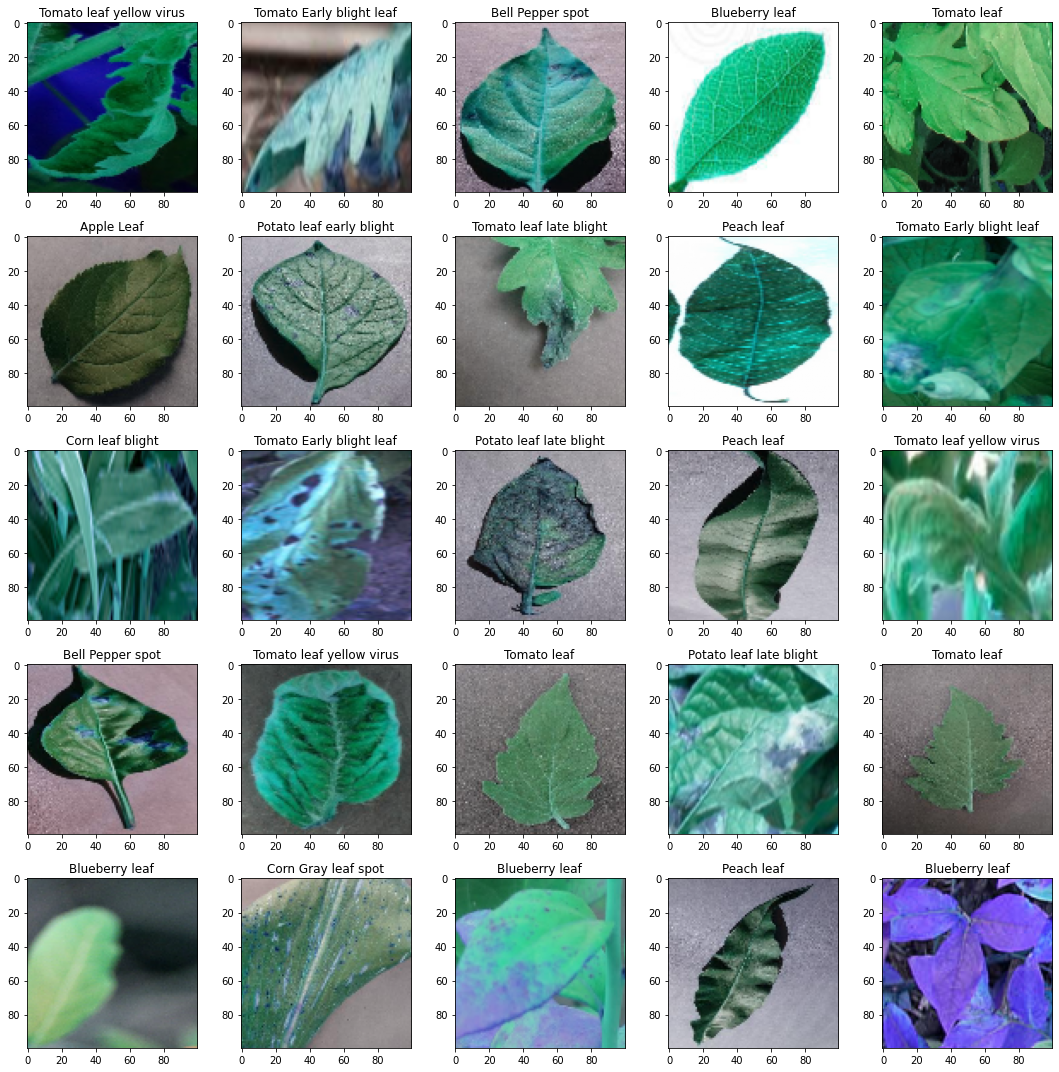

In [ ]:
import matplotlib.pyplot as plt
import random as rn
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title(Z[l])
        
plt.tight_layout()

In [ ]:
from keras.models import Sequential,Input,Model
from IPython.display import SVG
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.applications import InceptionResNetV2, InceptionV3
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from keras.models import load_model

base_model = InceptionResNetV2(weights='imagenet',include_top=False,input_shape = (imgsize,imgsize,3))
base_model.output_shape[1]

for layer in base_model.layers:
     layer.trainable = False
    
# # for layer in base_model.layers:
# #     print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(39,activation='softmax'))
model.summary()

# chanDim = -1
# model = Sequential()
# model.add(Conv2D(32, (3, 3), padding="same",input_shape = (imgsize,imgsize,3)))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(1024))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(39))
# model.add(Activation("softmax"))
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 1, 1, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1536)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1536)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1573888   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)
reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:92: UserWarning: The TensorBoard callback `batch_size` argument (for histogram computation) is deprecated with TensorFlow 2.0. It will be ignored.
  warnings.warn('The TensorBoard callback `batch_size` argument '
/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:97: UserWarning: The TensorBoard callback does not support gradients display when using TensorFlow 2.0. The `write_grads` argument is ignored.
  warnings.warn('The TensorBoard callback does not support '


In [ ]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train accuracy")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation accuracy")
    ax[0].legend()
    ax[1].legend()

In [ ]:
from keras.optimizers import Adam,SGD
opt = Adam(lr=0.001)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [ ]:
history = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=128),
    validation_data  = (x_test,y_test),
    epochs = 25, 
    verbose = 1,
    callbacks=callbacks
)

Epoch 1/25
111/111 [==============================] - 71s 643ms/step - loss: 3.6769 - accuracy: 0.0512 - val_loss: 3.4953 - val_accuracy: 0.0836

Epoch 00001: val_accuracy improved from -inf to 0.08360, saving model to ./base.model
Epoch 2/25
111/111 [==============================] - 53s 475ms/step - loss: 3.5361 - accuracy: 0.0758 - val_loss: 3.4951 - val_accuracy: 0.0880

Epoch 00002: val_accuracy improved from 0.08360 to 0.08803, saving model to ./base.model
Epoch 3/25
111/111 [==============================] - 53s 477ms/step - loss: 3.4480 - accuracy: 0.0940 - val_loss: 3.3765 - val_accuracy: 0.1197

Epoch 00003: val_accuracy improved from 0.08803 to 0.11970, saving model to ./base.model
Epoch 4/25
111/111 [==============================] - 53s 475ms/step - loss: 3.3687 - accuracy: 0.1127 - val_loss: 3.1640 - val_accuracy: 0.1545

Epoch 00004: val_accuracy improved from 0.11970 to 0.15453, saving model to ./base.model
Epoch 5/25
111/111 [==============================] - 53s 475ms

Weights Saved


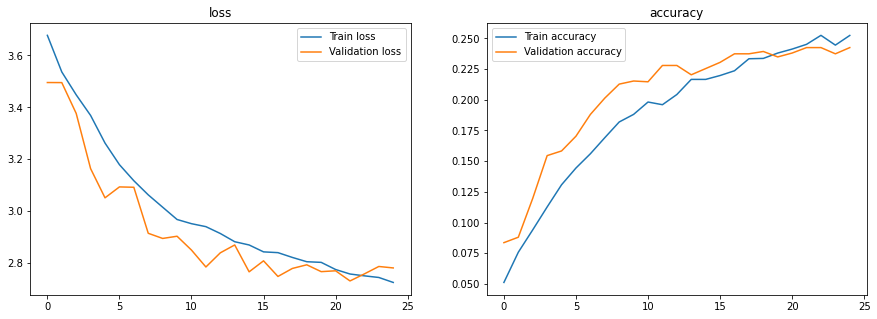

In [ ]:
show_final_history(history)
model.load_weights('./base.model')

model_json = model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)
    
model.save("model.h5")
print("Weights Saved")

Tomato Septoria leaf spot
Tomato Early blight leaf
Tomato leaf bacterial spot


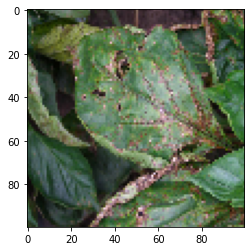

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
img = image.load_img('/content/PlantDiseaseAnalysis/TEST/00.jpg',target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,100,100,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
  print(Pred[top_3[i]])
plt.imshow(img)